In [23]:
import xarray as xr
import xclim

In [24]:
HURS_PATH = "/Users/ericcollins/climate-risk-map-hazards/Wildfire/FWI/data_test/hurs_day_CESM2_ssp126_r4i1p1f1_gn_2030_v1.1.nc"
PR_PATH = "/Users/ericcollins/climate-risk-map-hazards/Wildfire/FWI/data_test/pr_day_CESM2_ssp126_r4i1p1f1_gn_2030_v1.1.nc"
TAS_PATH = "/Users/ericcollins/climate-risk-map-hazards/Wildfire/FWI/data_test/tas_day_CESM2_ssp126_r4i1p1f1_gn_2030.nc"
SFC_WIND_PATH = "/Users/ericcollins/climate-risk-map-hazards/Wildfire/FWI/data_test/sfcWind_day_CESM2_ssp126_r4i1p1f1_gn_2030.nc"


In [8]:
hurs = xr.open_dataset(HURS_PATH).hurs
tas = xr.open_dataset(TAS_PATH).tas
sfcWind = xr.open_dataset(SFC_WIND_PATH).sfcWind
pr = xr.open_dataset(PR_PATH).pr

In [9]:
out_fwi = xclim.indicators.atmos.cffwis_indices(
        tas=tas,
        pr=pr,
        hurs=hurs,
        sfcWind=sfcWind,
        lat=sfcWind.lat,
        #season_mask=season_mask,
        season_method = None,
        #dry_start = None,
        #initial_start_up = False,
        overwintering=False,
    )

names = ['dc','dmc','ffmc','isi','bui','fwi']
da_out = xr.Dataset({name: da for name, da in zip(names, out_fwi)})
da_out.compute()

/Users/ericcollins/opt/miniconda3/envs/xclim/lib/python3.12/site-packages/xclim/indices/fire/_cffwis.py:478: RuntimeWarning: invalid value encountered in divide
  (0.8 * dc * dmc) / (dmc + 0.4 * dc),  # *Eq.27a*#
/Users/ericcollins/opt/miniconda3/envs/xclim/lib/python3.12/site-packages/xclim/indices/fire/_cffwis.py:479: RuntimeWarning: invalid value encountered in divide
  dmc - (1.0 - 0.8 * dc / (dmc + 0.4 * dc)) * (0.92 + (0.0114 * dmc) ** 1.7),


<xarray.Dataset> Size: 8GB
Dimensions:  (time: 365, lat: 600, lon: 1440)
Coordinates:
  * time     (time) object 3kB 2030-01-01 00:00:00 ... 2030-12-31 00:00:00
  * lat      (lat) float64 5kB -59.88 -59.62 -59.38 -59.12 ... 89.38 89.62 89.88
  * lon      (lon) float64 12kB 0.125 0.375 0.625 0.875 ... 359.4 359.6 359.9
Data variables:
    dc       (lat, lon, time) float32 1GB nan nan nan nan ... nan nan nan nan
    dmc      (lat, lon, time) float32 1GB nan nan nan nan ... nan nan nan nan
    ffmc     (lat, lon, time) float32 1GB nan nan nan nan ... nan nan nan nan
    isi      (lat, lon, time) float32 1GB nan nan nan nan ... nan nan nan nan
    bui      (lat, lon, time) float32 1GB nan nan nan nan ... nan nan nan nan
    fwi      (lat, lon, time) float32 1GB nan nan nan nan ... nan nan nan nan

(array([7.2804073e+07, 7.9213180e+06, 5.6173980e+06, 3.8283020e+06,
        2.0060840e+06, 4.5204700e+05, 6.9093000e+04, 1.0749000e+04,
        1.5980000e+03, 9.5000000e+01]),
 array([3.99457578e-10, 1.51412306e+01, 3.02824612e+01, 4.54236908e+01,
        6.05649223e+01, 7.57061539e+01, 9.08473816e+01, 1.05988617e+02,
        1.21129845e+02, 1.36271072e+02, 1.51412308e+02]),
 <BarContainer object of 10 artists>)

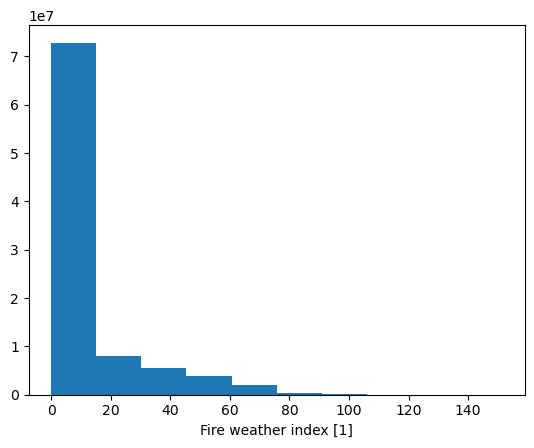

In [12]:
da_out.fwi.plot(
)

In [ ]:
import math



120

In [19]:
1440 % 31

14

In [21]:
1440/24

60.0

In [22]:
8 ** 0.5

2.8284271247461903